In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style ='dark' )

In [3]:
df = pd.read_csv(r"F:\My_CSV_\AIML Dataset.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [13]:
df['isFraud'].unique()

array([0, 1])

In [9]:
df['isFlaggedFraud'].unique()

array([0, 1])

In [10]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [12]:
df.shape

(6362620, 11)

In [13]:
round(df['isFraud'].value_counts()[1] / df['isFraud'].shape[0] * 100, 2)

np.float64(0.13)

In [14]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

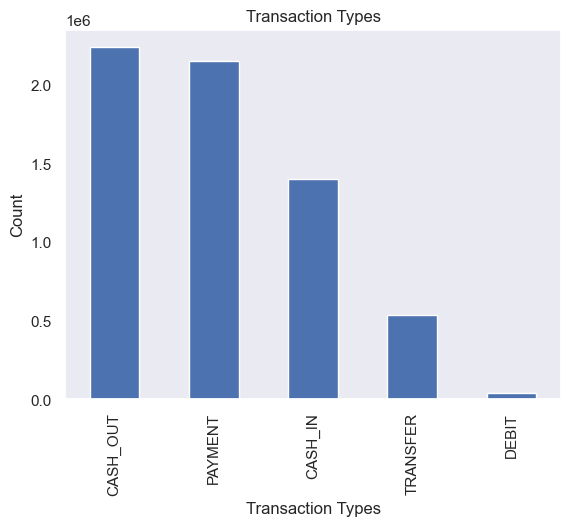

In [15]:
df['type'].value_counts().plot(kind = 'bar', title  = 'Transaction Types')
plt.xlabel('Transaction Types')
plt.ylabel('Count')
plt.show()

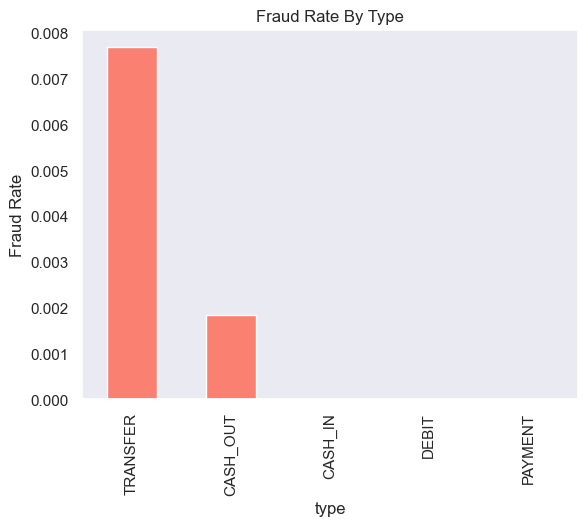

In [16]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending = False)
fraud_by_type.plot(kind = 'bar' , title = 'Fraud Rate By Type', color = 'salmon')
plt.ylabel('Fraud Rate')
plt.show()

In [17]:
fraud_by_type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [18]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

## log1p(x) ≡ log(x + 1) — a transformation that is mathematically simple but numerically safer.

Used to:

-- Avoid undefined values for x = 0

-- Stabilize computations for small x

-- Improve accuracy in floating-point environments

-- Handle skewed data in data preprocessing

kde=True: Adds a Kernel Density Estimate line to smooth out the histogram and show the data distribution.


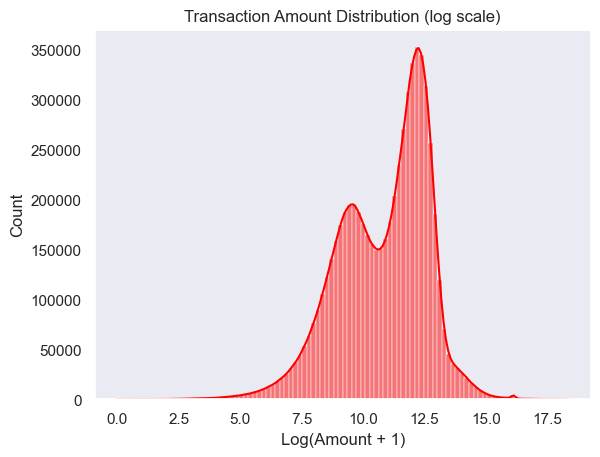

In [19]:
sns.histplot(np.log1p(df['amount']), bins = 100, kde = True, color = 'red')
plt.title('Transaction Amount Distribution (log scale)')
plt.xlabel('Log(Amount + 1)')
plt.show()

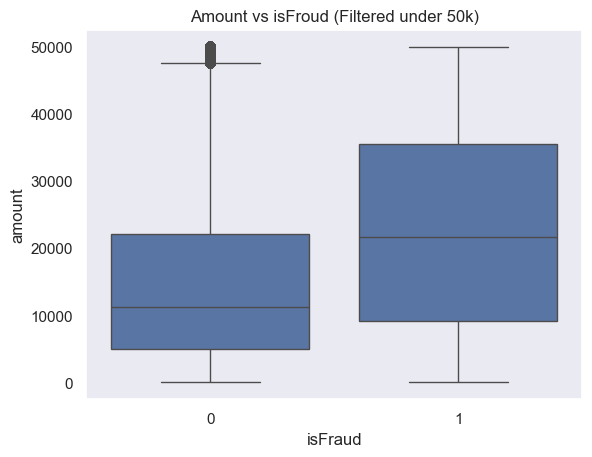

In [20]:
sns.boxplot(data = df[df['amount'] < 50000] , x = 'isFraud', y ='amount' )
plt.title('Amount vs isFroud (Filtered under 50k)')
plt.show()

In [85]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffdest'] = df['oldbalanceDest'] - df['newbalanceDest']

In [22]:
(df['balanceDiffOrig'] < 0).sum()

np.int64(1399253)

In [23]:
(df['balanceDiffdest'] < 0).sum()

np.int64(2806464)

In [24]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffdest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


## 'step' is a column which is increasing by Day

In [92]:
df['step'].nunique()

743

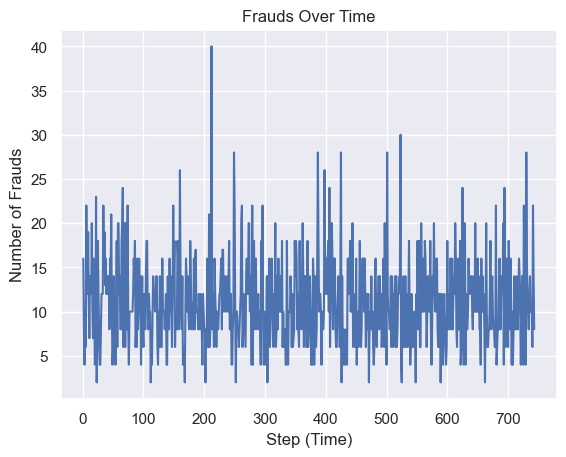

In [25]:
frauds_per_step = df[df['isFraud'] ==1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index , frauds_per_step.values , label = 'Fraude Per Step')
plt.xlabel('Step (Time)')
plt.ylabel('Number of Frauds')
plt.title('Frauds Over Time')           
plt.grid(True)    
plt.show()

In [5]:
df.drop(columns = ['step'], inplace = True)

In [27]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffdest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [28]:
top_senders = df['nameOrig'].value_counts().head(10)
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [29]:
top_receivers = df['nameDest'].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [30]:
fraud_users  = df[df['isFraud']  ==1]['nameOrig'].value_counts().head(10)
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [31]:
fraud_types = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]
fraud_types.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffdest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89


In [33]:
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

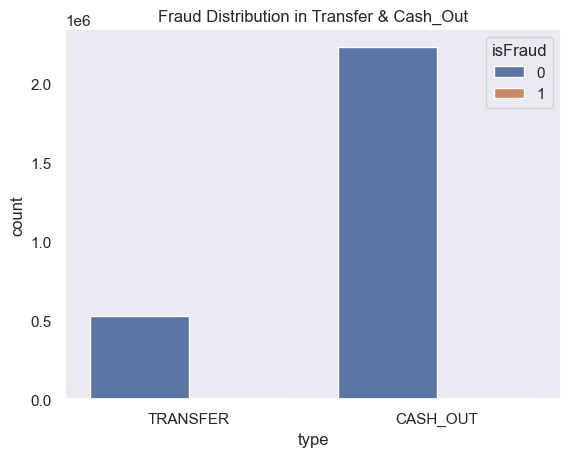

In [34]:
sns.countplot(data = fraud_types, x = 'type', hue = 'isFraud')
plt.title('Fraud Distribution in Transfer & Cash_Out')
plt.show()

In [35]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'oldbalanceDest', 'isFraud']].corr()

In [36]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,oldbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.294137,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.066243,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.067812,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,1.000000,-0.005885
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,1.000000,-0.005885
isFraud,0.076688,0.010154,-0.008148,-0.005885,-0.005885,1.000000


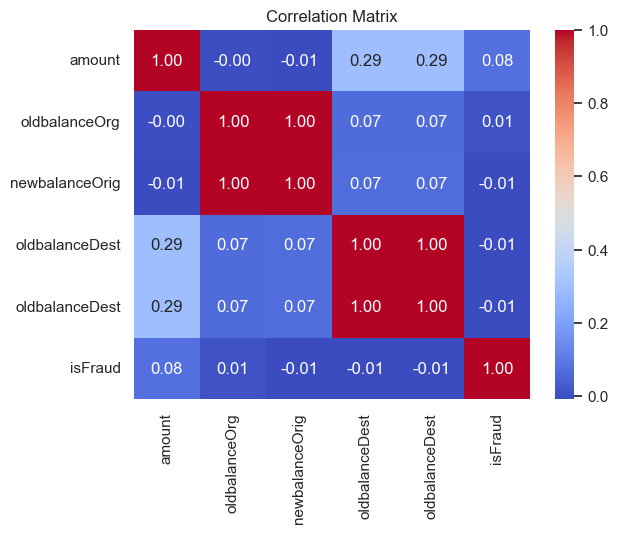

In [37]:
sns.heatmap(corr, annot=True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [38]:
zero_after_transfer = df[
    (df['oldbalanceOrg']  > 0) &
    (df['newbalanceOrig'] == 0)&
    (df['type'].isin(['TRANSFER', 'CASH_OUT']))



]

In [39]:
len(zero_after_transfer)

1188074

In [40]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffdest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89


## FEATURE ENGINEERING

In [41]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [42]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffdest'],
      dtype='object')

In [6]:
df_model = df.drop(columns = ['nameOrig', 'nameDest', 'isFlaggedFraud'], axis =1)

In [44]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffdest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [127]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   type             object 
 1   amount           float64
 2   oldbalanceOrg    float64
 3   newbalanceOrig   float64
 4   oldbalanceDest   float64
 5   newbalanceDest   float64
 6   isFraud          int64  
 7   balanceDiffOrig  float64
 8   balanceDiffdest  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 436.9+ MB


In [7]:
categorical = ['type']
numeric = ['amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [8]:
X = df_model
y = df_model.pop('isFraud')

In [131]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDiffOrig,balanceDiffdest
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,9839.64,0.00
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,1864.28,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,181.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,181.00,21182.00
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,11668.14,0.00
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,339682.13,-339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,6311409.28,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,6311409.28,-6311409.27
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,850002.52,0.00


In [19]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify = y)

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(drop ='first' ), categorical)
     ], remainder = 'drop'




)

In [22]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['amount', 'oldbalanceOrg', 'newbalanceOrig',
                                  'oldbalanceDest', 'newbalanceDest']),
                                ('cat', OneHotEncoder(drop='first'), ['type'])])

In [2]:
import joblib
#joblib.dump(preprocessor, "preprocessor.pkl")


In [3]:
preprocessor = joblib.load("preprocessor.pkl")


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV





pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight ='balanced' , max_iter = 1000))
])



In [12]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [26]:
y_pred = pipeline.predict(X_test)


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [30]:
confusion_matrix(y_test, y_pred)

array([[1804823,  101499],
       [    151,    2313]])

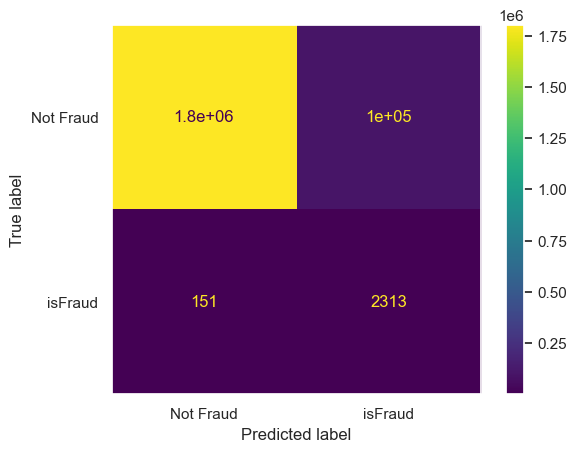

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test,  display_labels=['Not Fraud', 'isFraud']);

In [35]:
pipeline.score(X_test, y_test)

0.9467462565211606

In [37]:
rf_proba = pipeline.predict_proba(X_test)
pd.DataFrame(rf_proba)

,0,1
0,1.000000,3.983660e-71
1,1.000000,3.267013e-33
2,1.000000,4.896504e-71
3,1.000000,5.782874e-71
4,0.854483,1.455170e-01
...,...,...
1908781,1.000000,5.816830e-71
1908782,1.000000,4.302204e-71
1908783,0.810298,1.897019e-01
1908784,0.444255,5.557453e-01


In [38]:
rf_proba = rf_proba[:,1]
# if we select only the second column we will select all probabilities for our test what is fraud

In [39]:
from sklearn.metrics import roc_curve

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_proba)

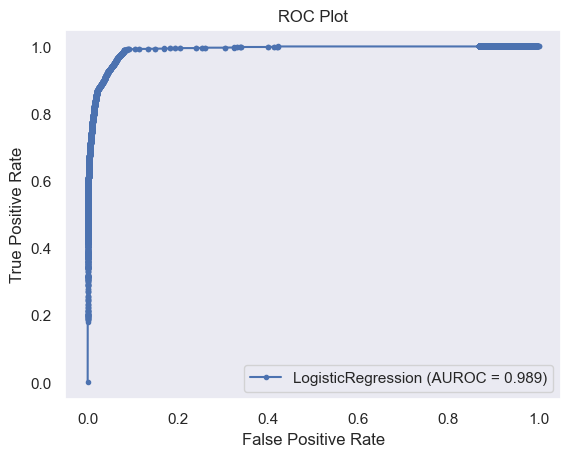

In [40]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test,rf_proba)

plt.plot(rf_fpr, rf_tpr, marker='.', label='LogisticRegression (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

In [41]:
win_threshold = pd.DataFrame({'fpr':rf_fpr,'tpr':rf_tpr,'threshold':rf_threshold})
win_threshold

,fpr,tpr,threshold
0,0.000000,0.000000,inf
1,0.000005,0.180195,1.000000e+00
2,0.000005,0.185471,1.000000e+00
3,0.000005,0.186282,1.000000e+00
4,0.000005,0.187906,1.000000e+00
...,...,...,...
20507,0.998416,1.000000,3.218489e-71
20508,0.998512,1.000000,3.214870e-71
20509,0.998513,1.000000,3.214855e-71
20510,0.999994,1.000000,7.415448e-308


In [42]:
win_threshold[win_threshold.tpr==1].sort_values("threshold", ascending=False).head(1)

,fpr,tpr,threshold
2954,0.423036,1.0,4.671834e-08


In [43]:
best_thresh = win_threshold[win_threshold.tpr == 1].sort_values("threshold", ascending=False).head(1)["threshold"].values[0]
best_thresh

np.float64(4.6718344973543173e-08)

In [47]:
y_pred = (rf_proba>= best_thresh).astype(int)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [48]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

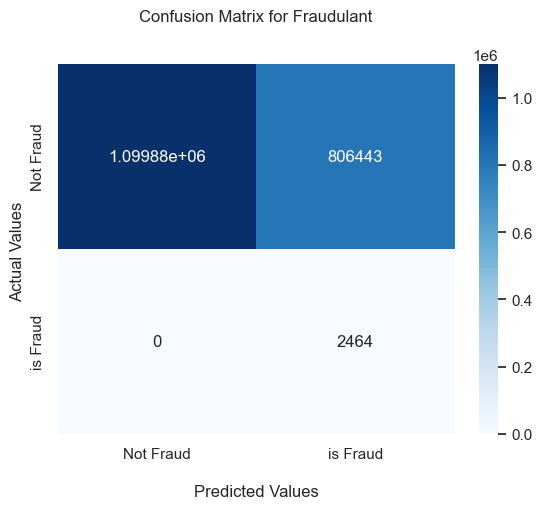

In [49]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix for Fraudulant\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Fraud','is Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud','is Fraud'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [50]:
win_threshold['youden_j'] = win_threshold['tpr'] - win_threshold['fpr']


In [51]:
best_thresh_1 = win_threshold.sort_values('youden_j', ascending=False).iloc[0]['threshold']


In [53]:
best_thresh_1

np.float64(0.3877568881293199)

In [54]:


y_pred = (rf_proba >= best_thresh_1).astype(int)


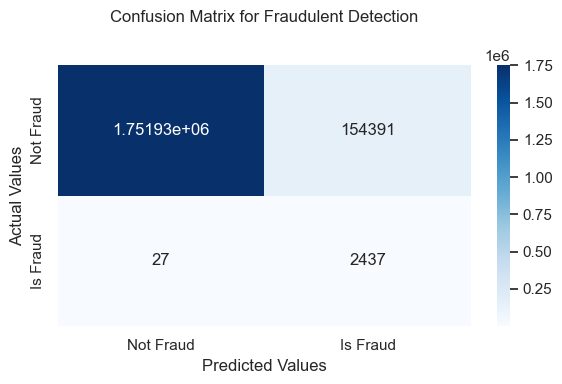

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and titles
ax.set_title('Confusion Matrix for Fraudulent Detection\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

# Set tick labels (ensure correct order!)
ax.xaxis.set_ticklabels(['Not Fraud', 'Is Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Is Fraud'])

# Show plot
plt.tight_layout()
plt.show()


In [56]:
win_threshold["cost"] = 5 * (1 - win_threshold["tpr"]) + 1 * win_threshold["fpr"]
best_thresh_2 = win_threshold.sort_values("cost").head(1)["threshold"].values[0]
best_thresh_2

np.float64(0.36708819166251655)

In [57]:
y_pred = (rf_proba >= best_thresh_2).astype(int)


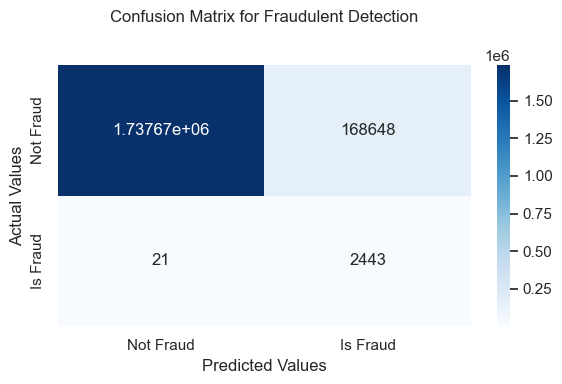

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and titles
ax.set_title('Confusion Matrix for Fraudulent Detection\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

# Set tick labels (ensure correct order!)
ax.xaxis.set_ticklabels(['Not Fraud', 'Is Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Is Fraud'])

# Show plot
plt.tight_layout()
plt.show()


In [60]:
# Sort thresholds by Youden J again
best_row = win_threshold.sort_values("youden_j", ascending=False).iloc[0]
print(best_row)

# Check nearby thresholds
around_best = win_threshold[
    (win_threshold['threshold'] > best_row['threshold'] * 0.95) & 
    (win_threshold['threshold'] < best_row['threshold'] * 1.05)
].sort_values("threshold", ascending=False)

print(around_best.head())


fpr          0.080989
tpr          0.989042
threshold    0.387757
youden_j     0.908053
cost         0.135778
Name: 2900, dtype: float64
           fpr       tpr  threshold  youden_j      cost
2847  0.075552  0.978084   0.405909  0.902533  0.185130
2848  0.075552  0.978490   0.405906  0.902938  0.183100
2849  0.075614  0.978490   0.405691  0.902877  0.183162
2850  0.075614  0.978896   0.405689  0.903282  0.181133
2851  0.075993  0.978896   0.404545  0.902903  0.181512


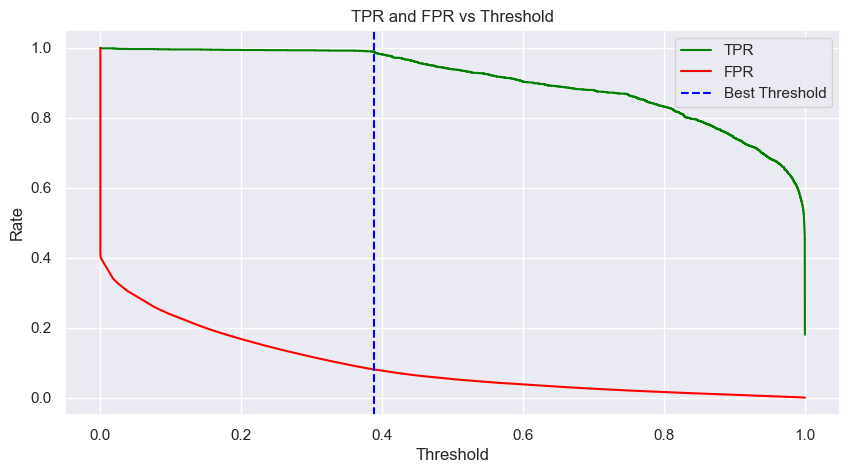

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(win_threshold['threshold'], win_threshold['tpr'], label='TPR', color='green')
plt.plot(win_threshold['threshold'], win_threshold['fpr'], label='FPR', color='red')
plt.axvline(x=0.387757, color='blue', linestyle='--', label='Best Threshold')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
import json

with open("best_threshold.json", "w") as f:
    json.dump({"threshold": float(best_thresh_2)}, f)


In [ ]:
'''
with open("best_threshold.json", "r") as f:
    threshold_data = json.load(f)
    best_thresh = threshold_data["threshold"]
'''

In [63]:
import joblib

# Save your final trained pipeline
joblib.dump(pipeline, 'fraud_detection_pipeline.pkl')


['fraud_detection_pipeline.pkl']